# 시작하기 앞서

본 챕터에서는 Neural Network를 이용한 Unsupervised Learning의 한 종류인 Autoencoder에 대해서 알아보도록 하겠다.<br>

# 오토 인코더(Autoencoder)란?

Autoencoder(이하 AE)는 기계학습 모델 중 하나로 비지도 학습(Unsupervised Learning) 모델이며 입력값 x에 대한 출력값 y를 x와 유사하게 만들고자 하는 것을 목표로 한다.

![](Autoencoder/ae_architecture.png)

<그림 1. Autoencoder 예시>

입력값 x를 Layer L2에서 encoding 한 후, L3에서 Reconstruction(Decoding)하는 과정이다.

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


x_train Shape:  (55000, 784)
y_train Shape:  (55000, 10)
x_test Shape:  (10000, 784)
y_test Shape:  (10000, 10)


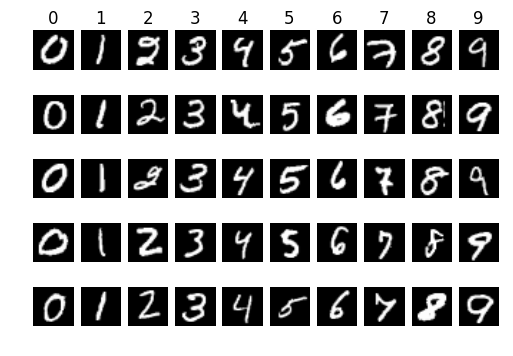

In [2]:
# MNIST 객체로부터 데이터를 얻어온다.
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

print("x_train Shape: ", x_train.shape)
print("y_train Shape: ", y_train.shape)
print("x_test Shape: ", x_test.shape)
print("y_test Shape: ", y_test.shape)

def plot_mnist(data, classes, row_len=5):
    
    for i in range(10):
        idxs = (classes == i) #조건에 맞는 index만 True 나머지는 False로 리턴된다.
        # 클래스 i에 해당하는 10개의 데이터
        images = data[idxs][0:10] #True조건을 만족하는 index로 data를 뽑고 그 중 10개를 뽑는다.
            
        for j in range(row_len):   
            plt.subplot(row_len, 10, i + j*10 + 1) # 행, 열, plot번호
            plt.imshow(images[j].reshape(28, 28), cmap='gray')
            # 클래스당 타이틀 표시
            if j == 0:
                plt.title(i)
            plt.axis('off')
    plt.show()

classes = np.argmax(y_train, 1) # [7 3 4 ..., 5 6 8] 형태로 출력된다.
plot_mnist(x_train, classes)

In [3]:
class Autoencoder(object):
    
    def __init__(self, sess, input_size, hidden_size):
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.weights = {                      
            'W_fc1': tf.Variable(tf.truncated_normal([self.input_size, self.hidden_size], stddev=0.1), name='W_fc1'),           
            'W_fc2': tf.Variable(tf.truncated_normal([self.hidden_size, self.input_size], stddev=0.1), name='W_fc2'),
        }
        
        self.biases = {
            'b_fc1': tf.Variable(tf.constant(0.1, shape=[self.hidden_size]), name='b_fc1'),
            'b_fc2': tf.Variable(tf.constant(0.1, shape=[self.input_size]), name='b_fc2'),    
        }
        
        # model
        self.x_input = tf.placeholder(tf.float32, [None, self.input_size])
        self.hidden = tf.matmul(self.x_input, self.weights['W_fc1']) + self.biases['b_fc1']
        self.reconstruction = tf.matmul(self.hidden, self.weights['W_fc2']) + self.biases['b_fc2']
        
        # cost
        self.loss = tf.reduce_sum(tf.pow((self.reconstruction - self.x_input), 2.0)) #* 0.5
        learning_rate = 1e-4
        optimizer = tf.train.AdamOptimizer(learning_rate)
        self.optimizer = optimizer.minimize(self.loss)
        

        
 

In [4]:
# Hyper parameter
input_size = 28*28
hidden_size = 100
num_of_iter = 5000
batch_size = 100


sess = tf.Session()
ae = Autoencoder(sess, input_size, hidden_size)

init = tf.global_variables_initializer()
sess.run(init)    

step: 0, loss: 50415.8
Original Image (step: 0)


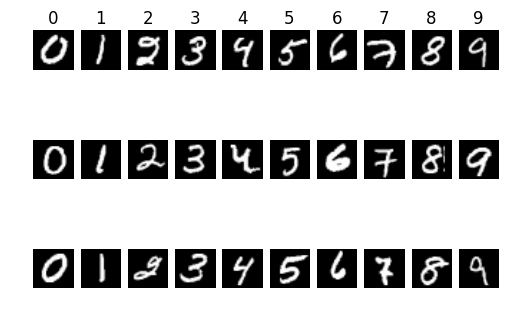


Reconstruction Image (step: 0)


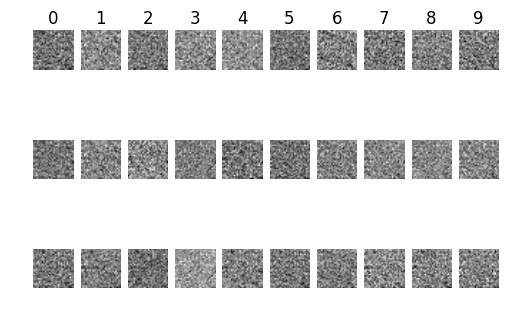

step: 100, loss: 21403.2
Original Image (step: 100)


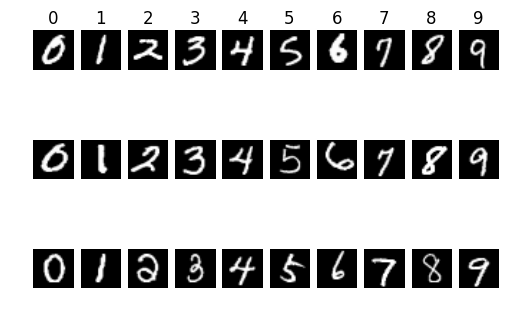


Reconstruction Image (step: 100)


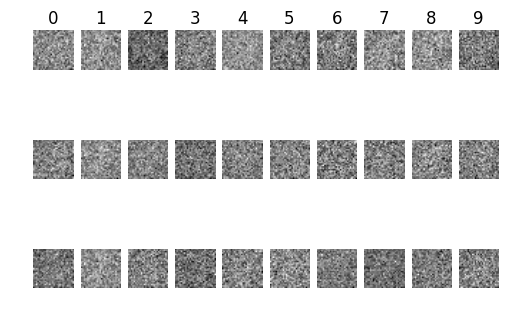

step: 200, loss: 15951.3
Original Image (step: 200)


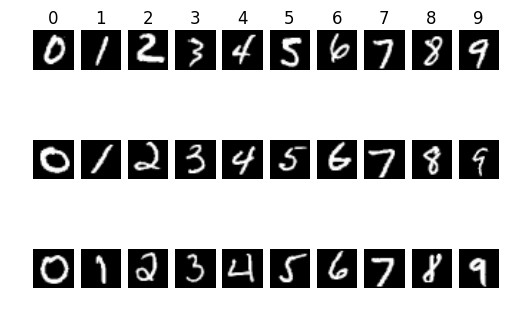


Reconstruction Image (step: 200)


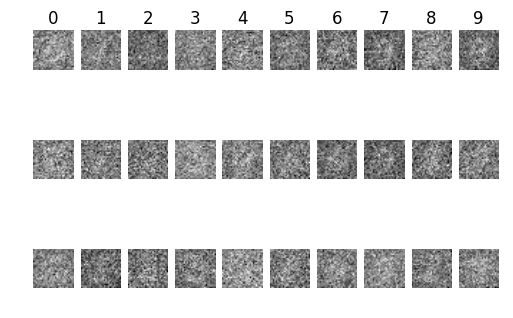

step: 300, loss: 12754
Original Image (step: 300)


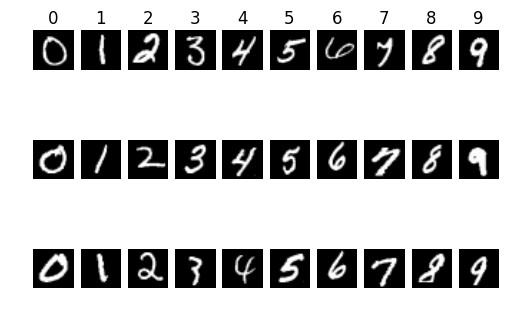


Reconstruction Image (step: 300)


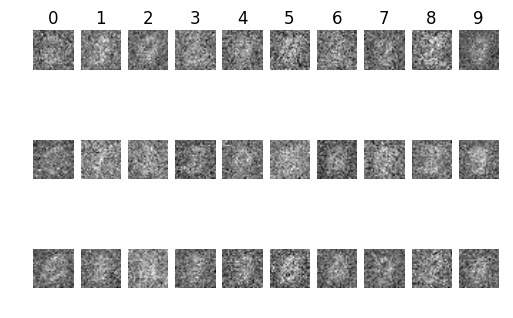

step: 400, loss: 10335.8
Original Image (step: 400)


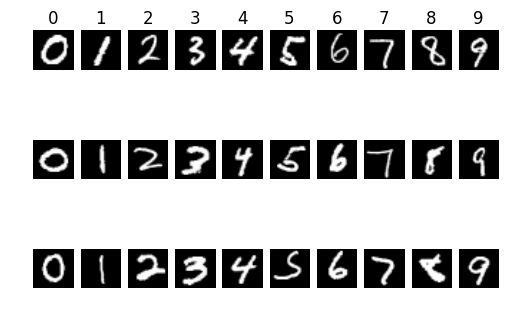


Reconstruction Image (step: 400)


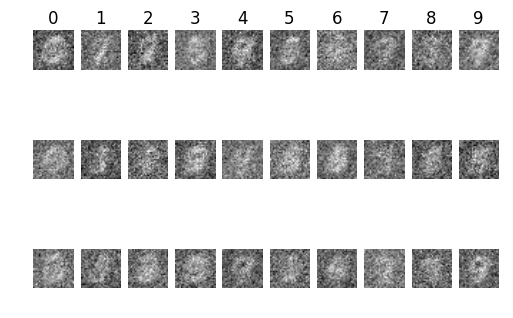

step: 500, loss: 9434.21
Original Image (step: 500)


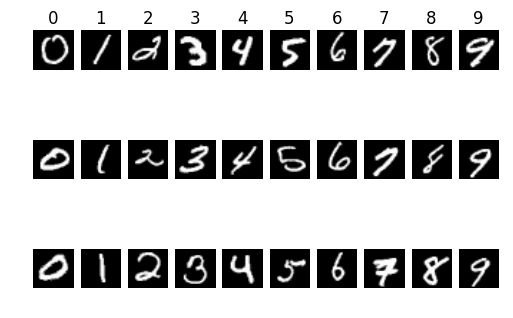


Reconstruction Image (step: 500)


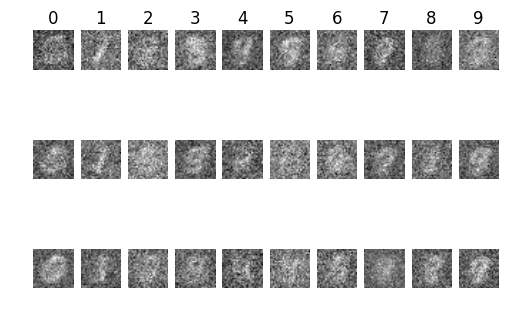

step: 600, loss: 8145.82
Original Image (step: 600)


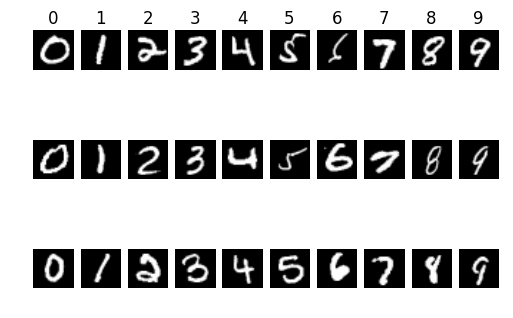


Reconstruction Image (step: 600)


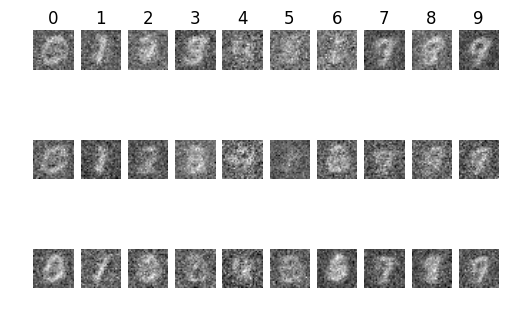

step: 700, loss: 7210.37
Original Image (step: 700)


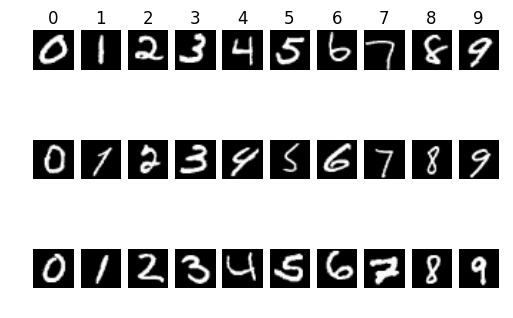


Reconstruction Image (step: 700)


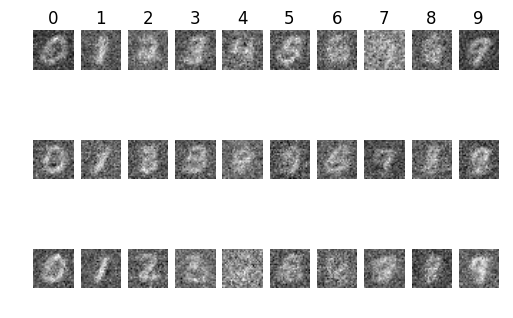

step: 800, loss: 6485.46
Original Image (step: 800)


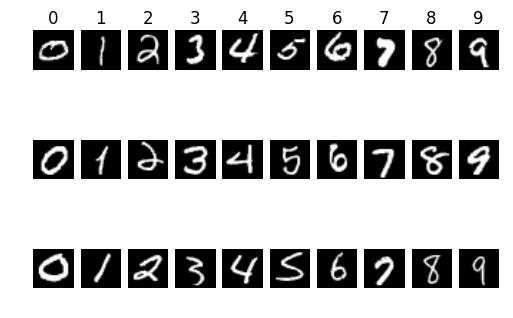


Reconstruction Image (step: 800)


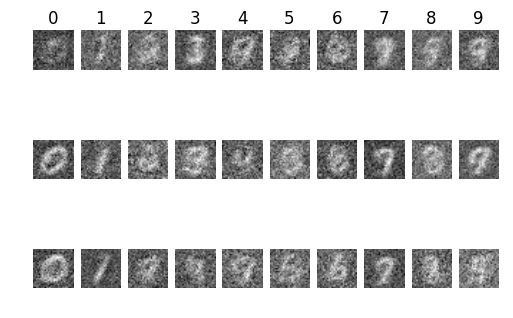

step: 900, loss: 5864.86
Original Image (step: 900)


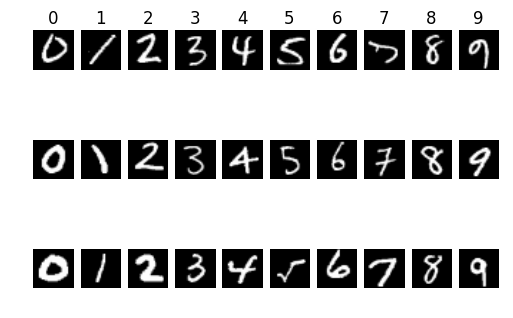


Reconstruction Image (step: 900)


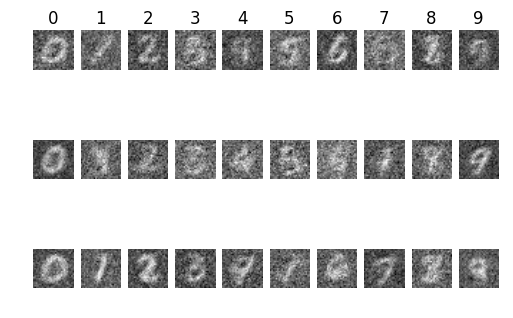

step: 1000, loss: 5363.26
Original Image (step: 1000)


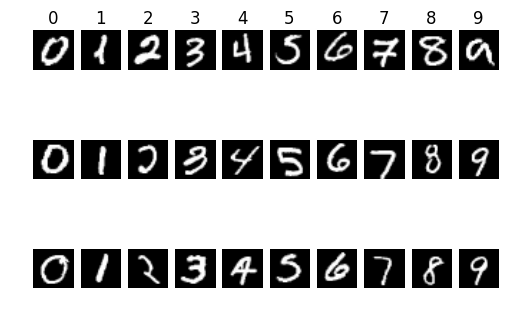


Reconstruction Image (step: 1000)


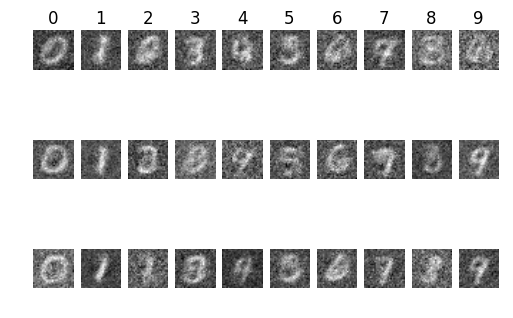

step: 1100, loss: 5040.32
Original Image (step: 1100)


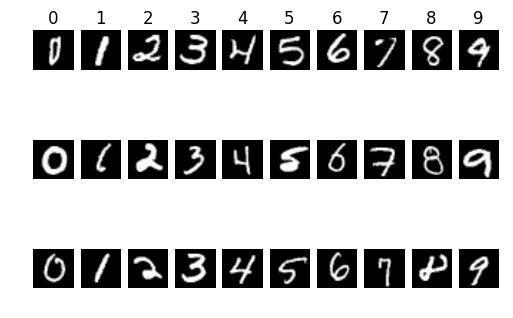


Reconstruction Image (step: 1100)


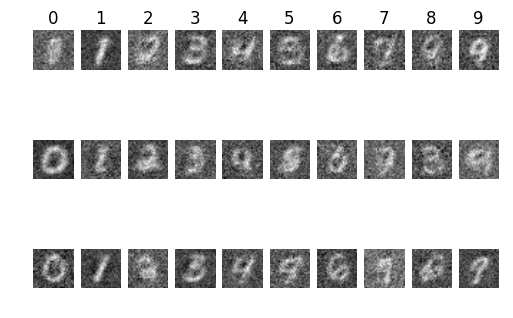

step: 1200, loss: 4664.79
Original Image (step: 1200)


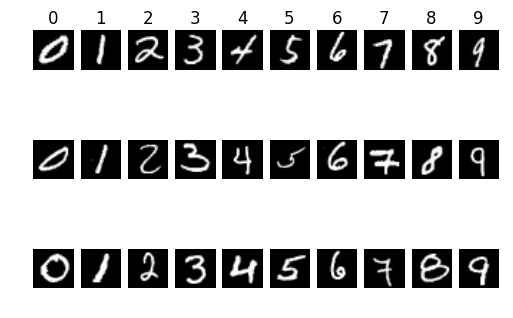


Reconstruction Image (step: 1200)


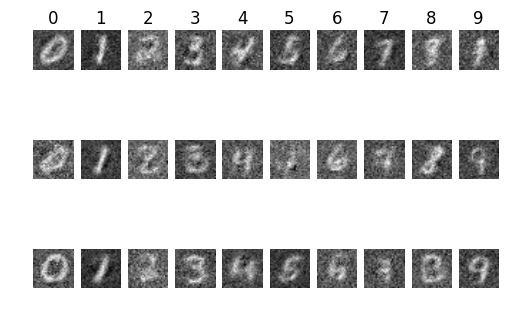

step: 1300, loss: 4421.87
Original Image (step: 1300)


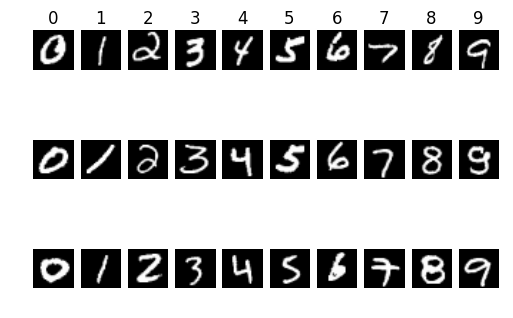


Reconstruction Image (step: 1300)


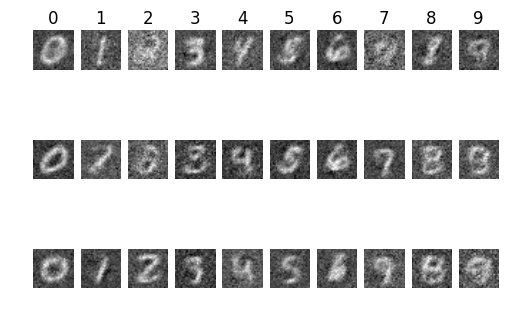

step: 1400, loss: 3698.84
Original Image (step: 1400)


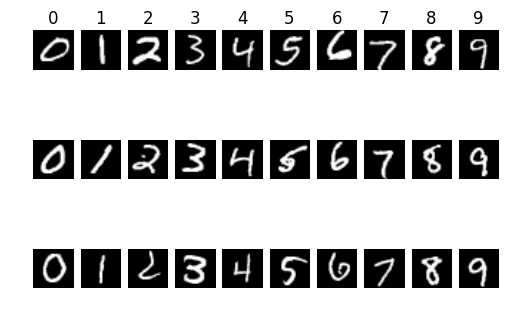


Reconstruction Image (step: 1400)


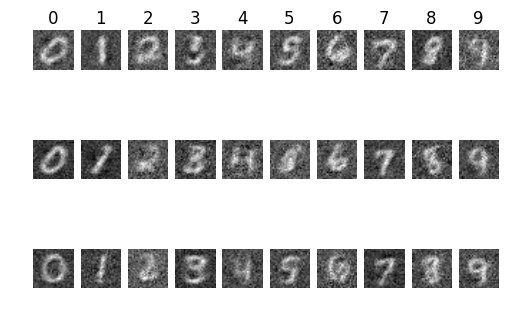

step: 1500, loss: 3679.21
Original Image (step: 1500)


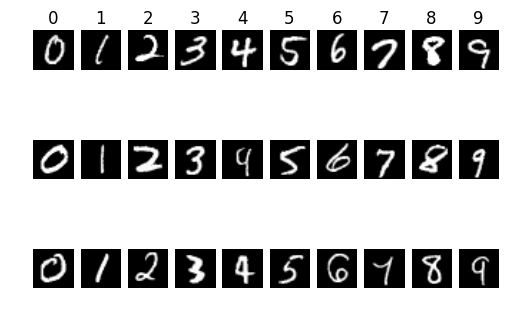


Reconstruction Image (step: 1500)


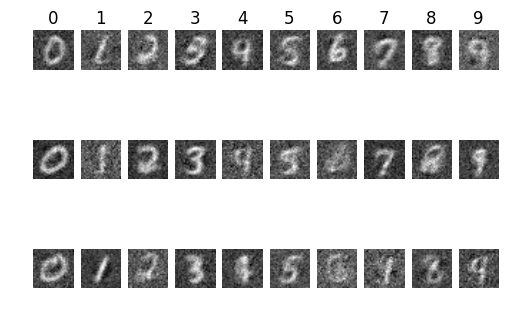

step: 1600, loss: 3512.18
Original Image (step: 1600)


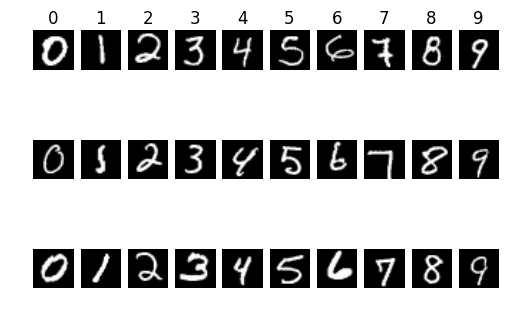


Reconstruction Image (step: 1600)


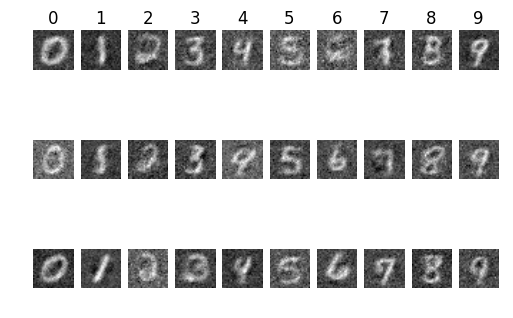

step: 1700, loss: 3265.11
Original Image (step: 1700)


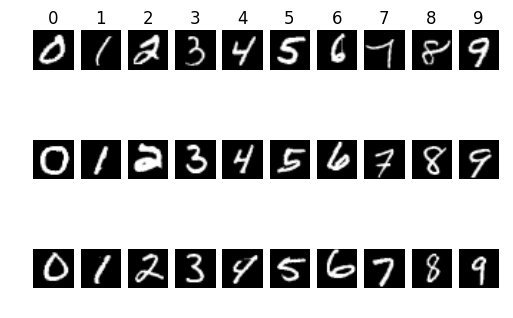


Reconstruction Image (step: 1700)


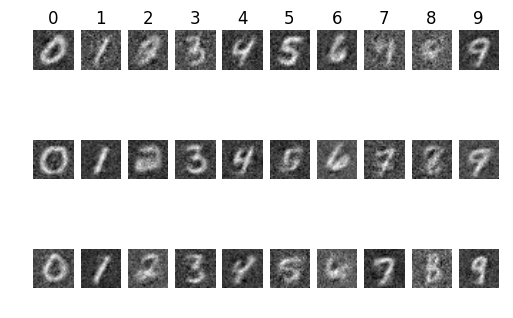

step: 1800, loss: 3218.1
Original Image (step: 1800)


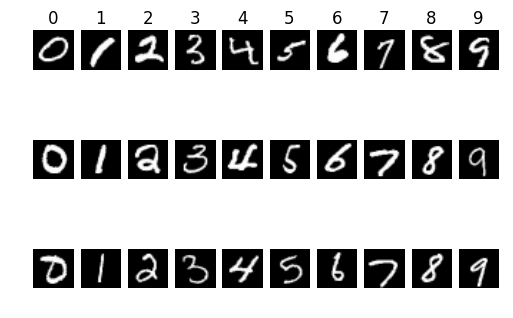


Reconstruction Image (step: 1800)


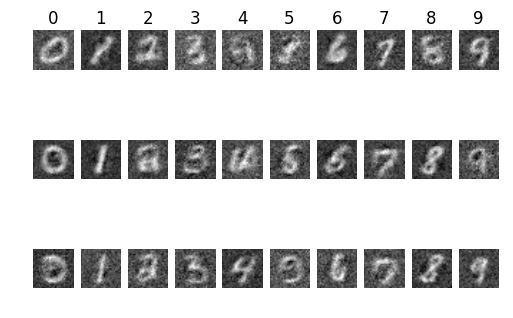

step: 1900, loss: 2915.71
Original Image (step: 1900)


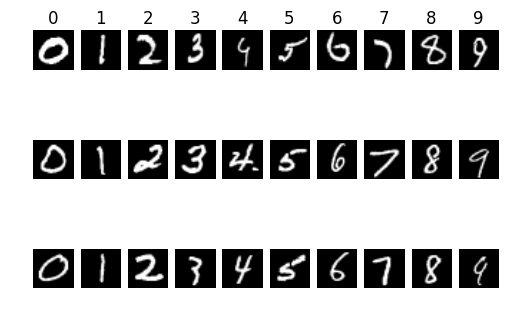


Reconstruction Image (step: 1900)


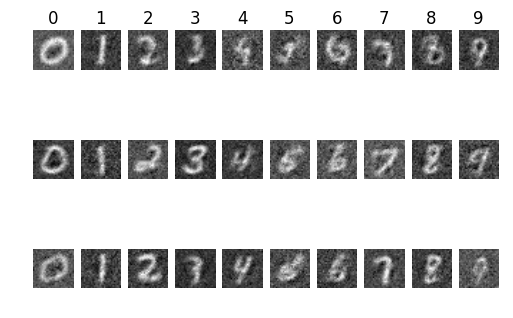

step: 2000, loss: 2873.06
Original Image (step: 2000)


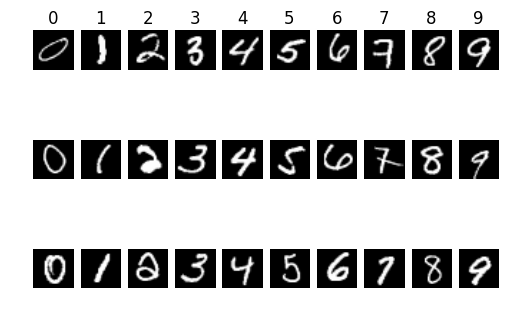


Reconstruction Image (step: 2000)


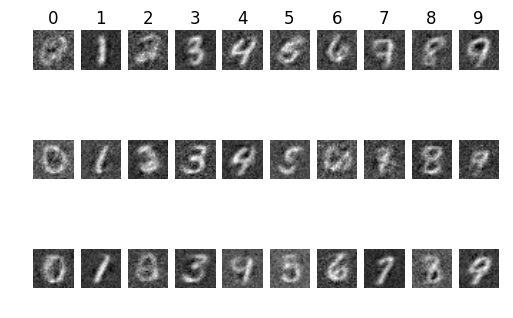

step: 2100, loss: 2802.95
Original Image (step: 2100)


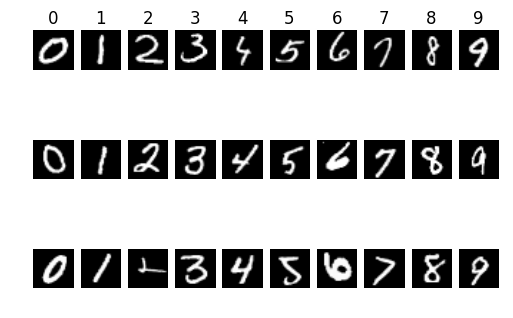


Reconstruction Image (step: 2100)


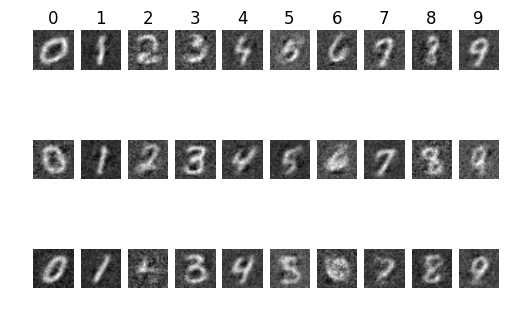

step: 2200, loss: 2357.85
Original Image (step: 2200)


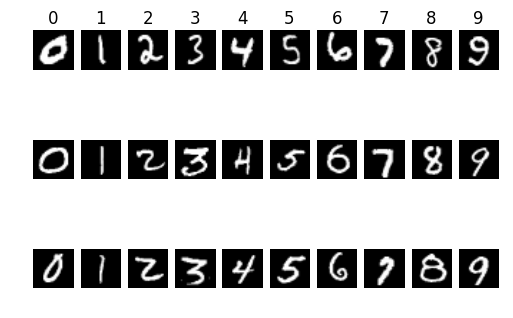


Reconstruction Image (step: 2200)


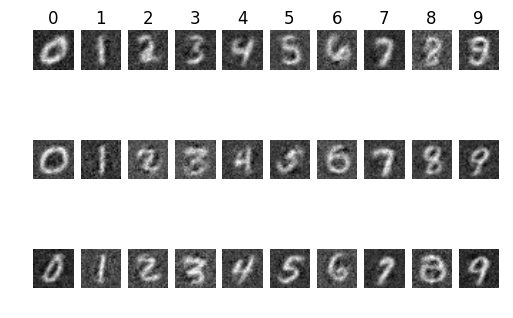

step: 2300, loss: 2422.86
Original Image (step: 2300)


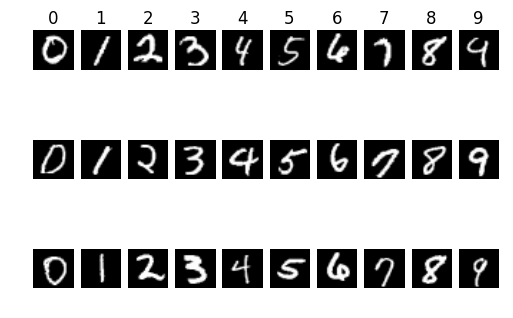


Reconstruction Image (step: 2300)


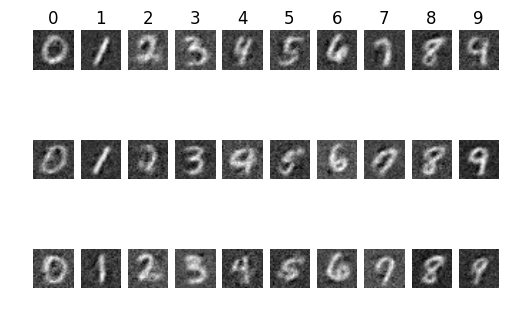

step: 2400, loss: 2271.21
Original Image (step: 2400)


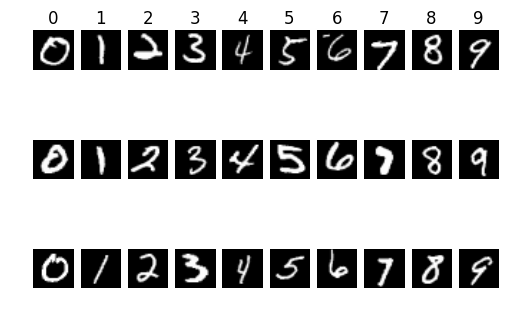


Reconstruction Image (step: 2400)


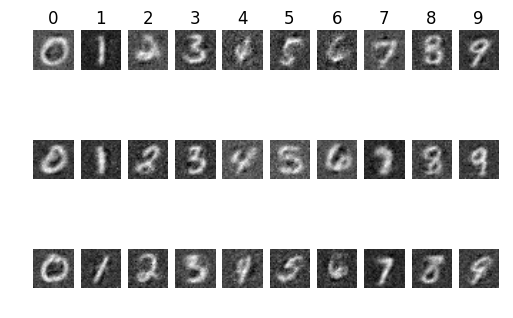

step: 2500, loss: 2165.89
Original Image (step: 2500)


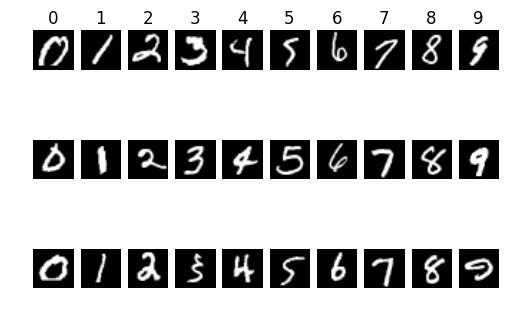


Reconstruction Image (step: 2500)


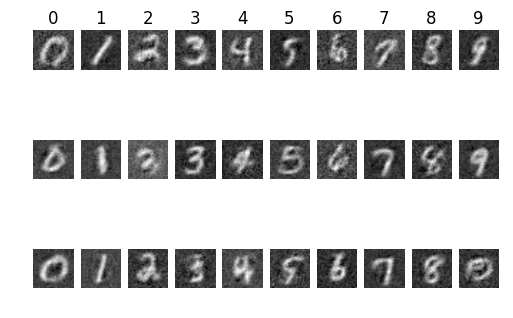

step: 2600, loss: 2118.79
Original Image (step: 2600)


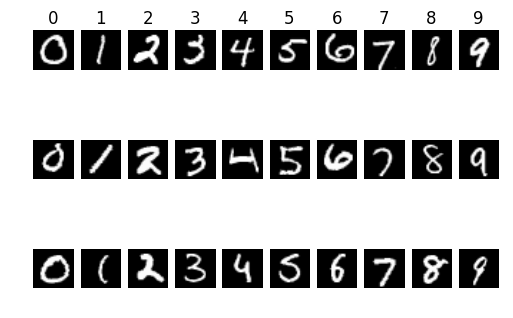


Reconstruction Image (step: 2600)


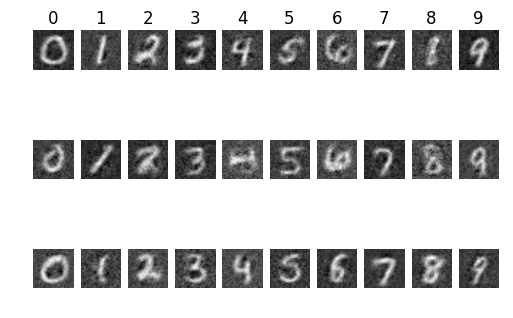

step: 2700, loss: 1990.44
Original Image (step: 2700)


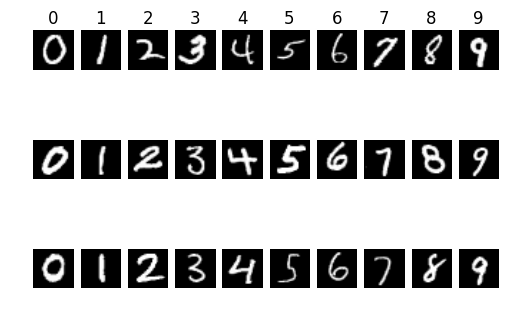


Reconstruction Image (step: 2700)


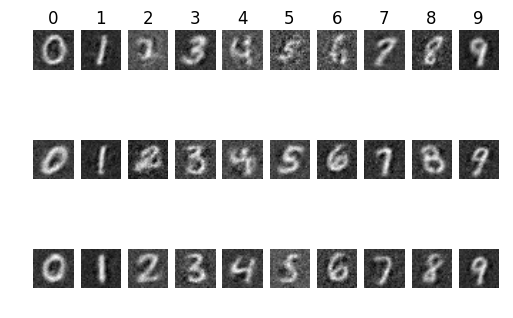

step: 2800, loss: 1951.23
Original Image (step: 2800)


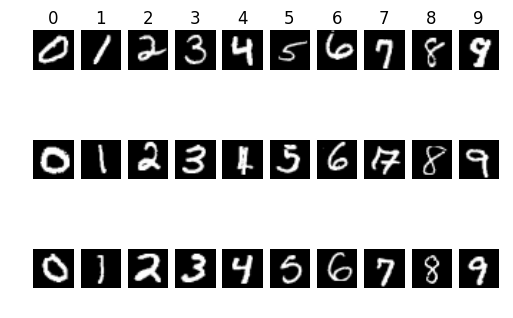


Reconstruction Image (step: 2800)


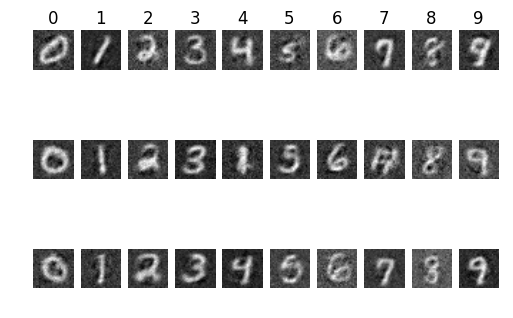

step: 2900, loss: 2023.59
Original Image (step: 2900)


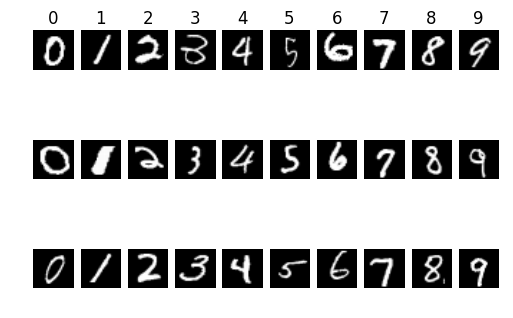


Reconstruction Image (step: 2900)


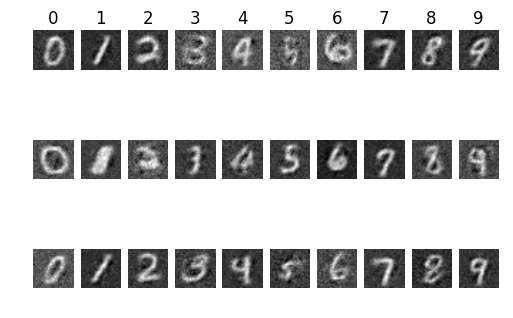

step: 3000, loss: 1819.49
Original Image (step: 3000)


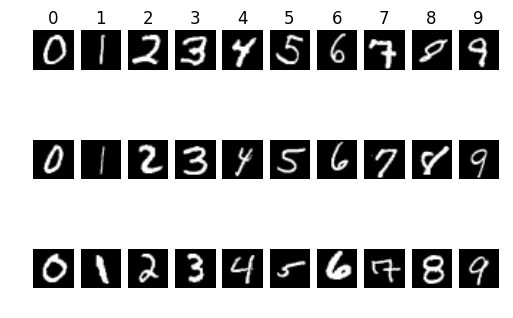


Reconstruction Image (step: 3000)


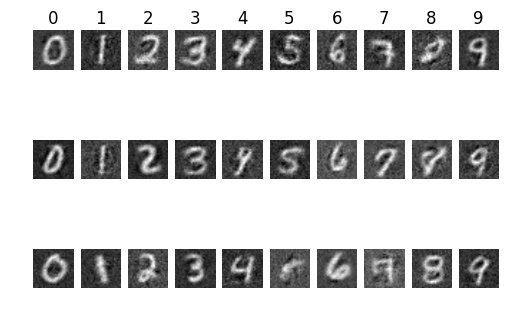

step: 3100, loss: 1811.83
Original Image (step: 3100)


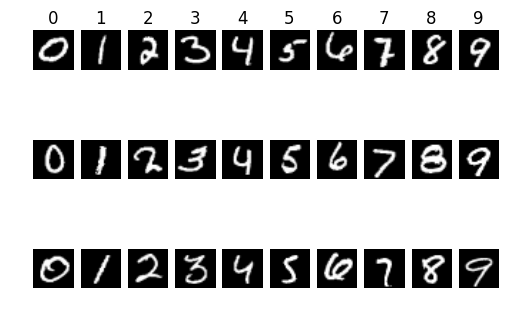


Reconstruction Image (step: 3100)


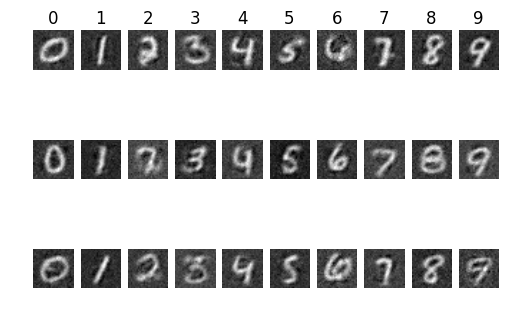

step: 3200, loss: 1936.93
Original Image (step: 3200)


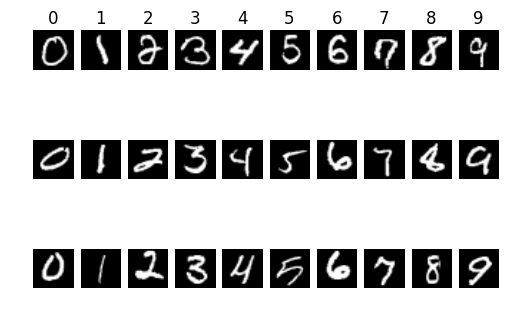


Reconstruction Image (step: 3200)


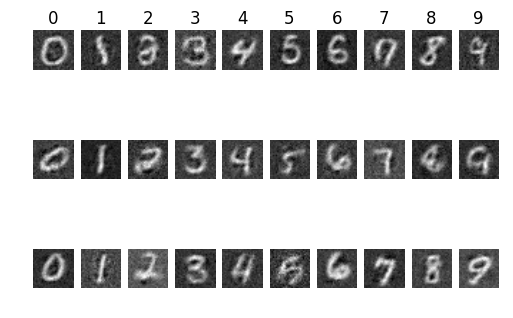

step: 3300, loss: 1618.56
Original Image (step: 3300)


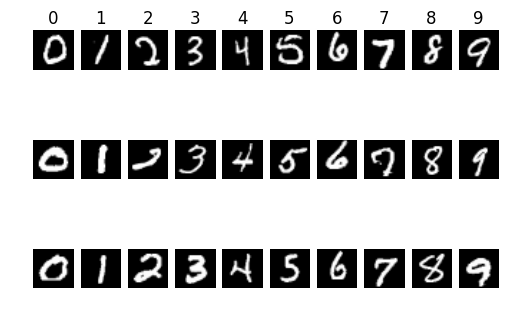


Reconstruction Image (step: 3300)


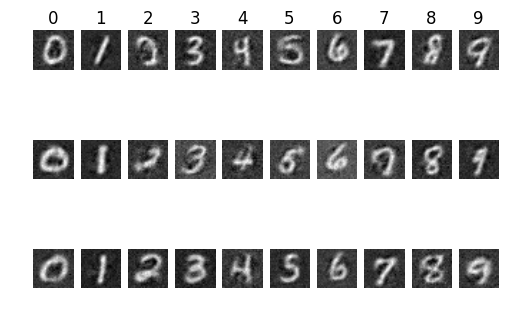

step: 3400, loss: 1608.44
Original Image (step: 3400)


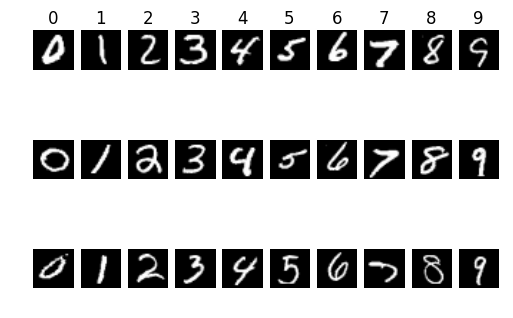


Reconstruction Image (step: 3400)


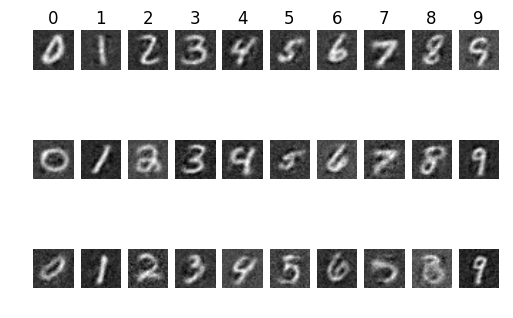

step: 3500, loss: 1630.59
Original Image (step: 3500)


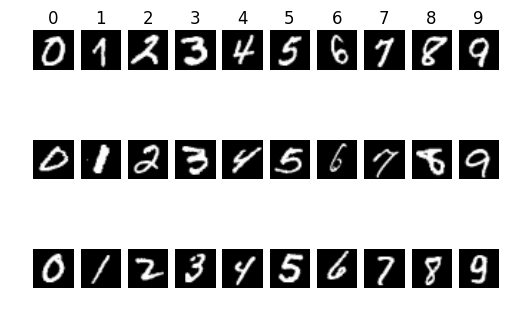


Reconstruction Image (step: 3500)


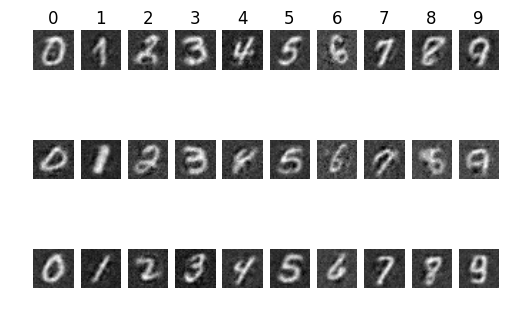

step: 3600, loss: 1518.54
Original Image (step: 3600)


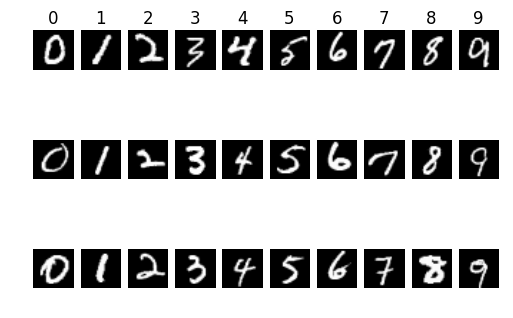


Reconstruction Image (step: 3600)


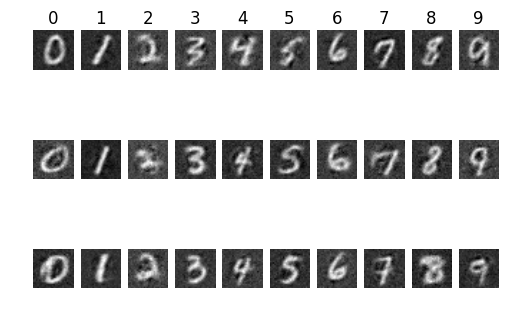

step: 3700, loss: 1509.14
Original Image (step: 3700)


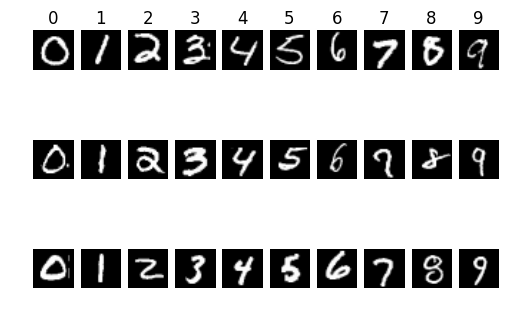


Reconstruction Image (step: 3700)


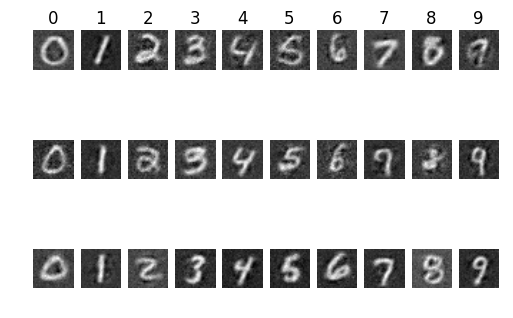

step: 3800, loss: 1531.79
Original Image (step: 3800)


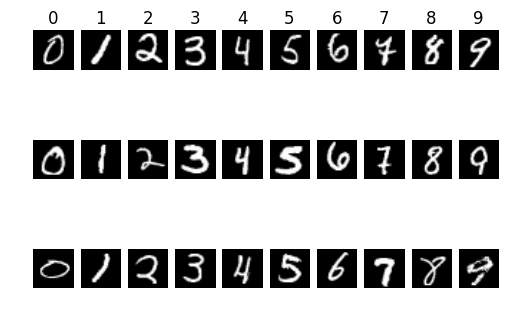


Reconstruction Image (step: 3800)


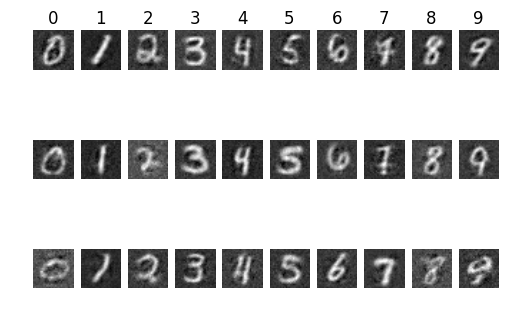

step: 3900, loss: 1382.5
Original Image (step: 3900)


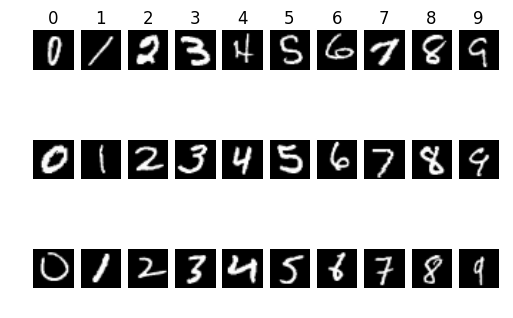


Reconstruction Image (step: 3900)


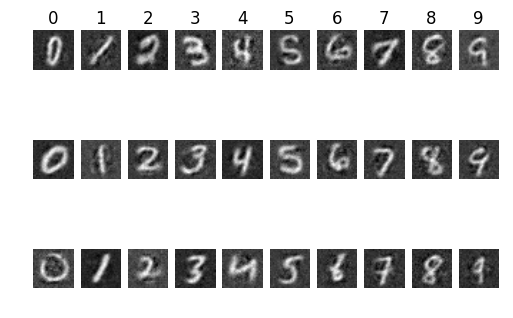

step: 4000, loss: 1290.46
Original Image (step: 4000)


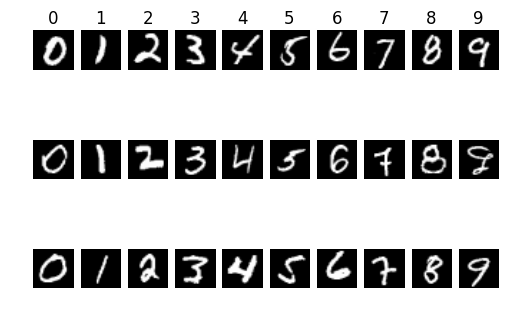


Reconstruction Image (step: 4000)


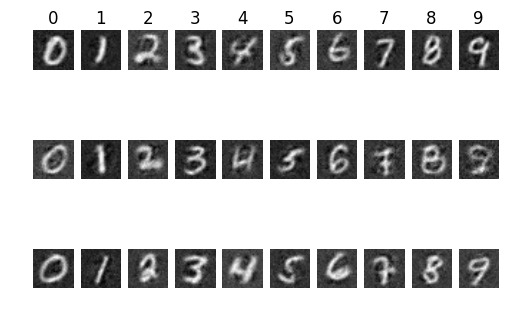

step: 4100, loss: 1322.5
Original Image (step: 4100)


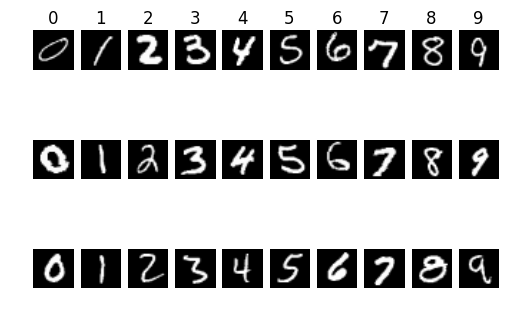


Reconstruction Image (step: 4100)


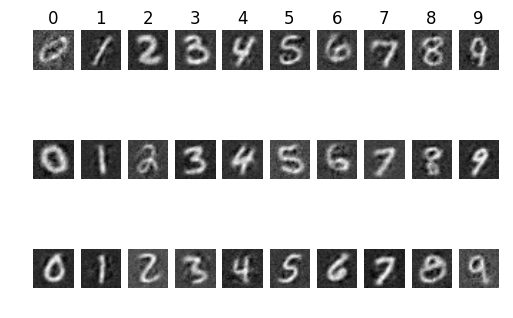

step: 4200, loss: 1221.62
Original Image (step: 4200)


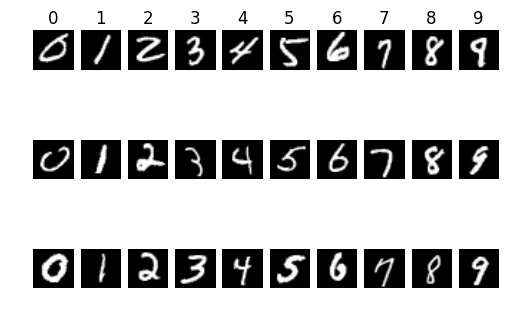


Reconstruction Image (step: 4200)


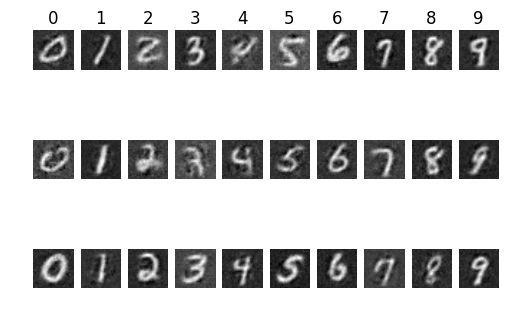

step: 4300, loss: 1354.57
Original Image (step: 4300)


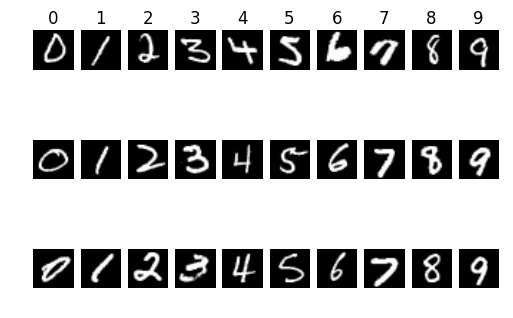


Reconstruction Image (step: 4300)


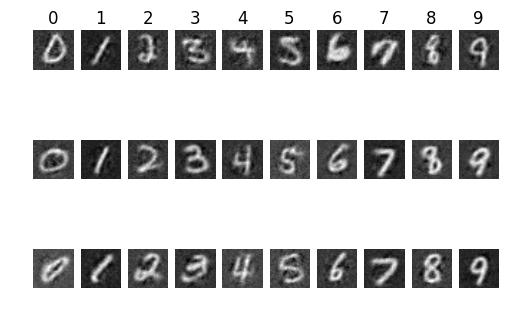

step: 4400, loss: 1305.08
Original Image (step: 4400)


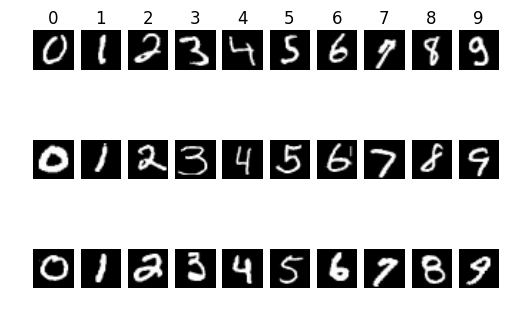


Reconstruction Image (step: 4400)


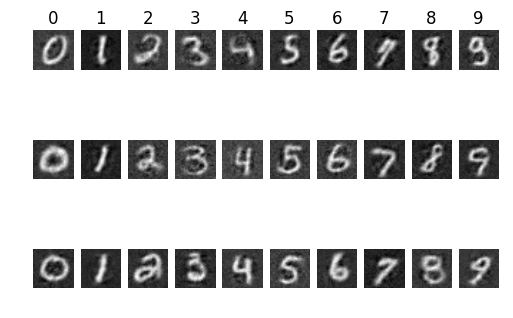

step: 4500, loss: 1195.24
Original Image (step: 4500)


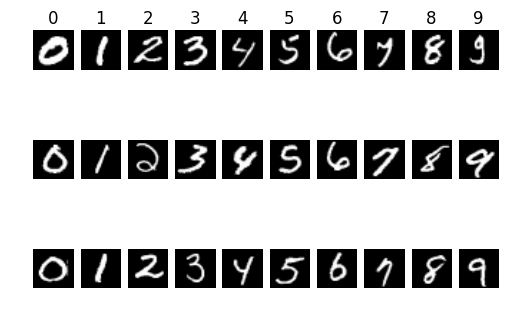


Reconstruction Image (step: 4500)


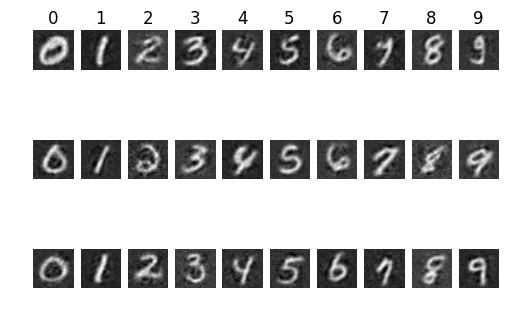

step: 4600, loss: 1168.76
Original Image (step: 4600)


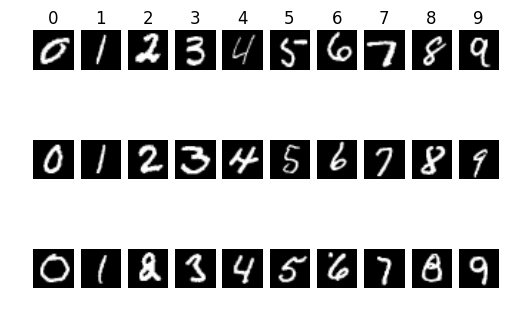


Reconstruction Image (step: 4600)


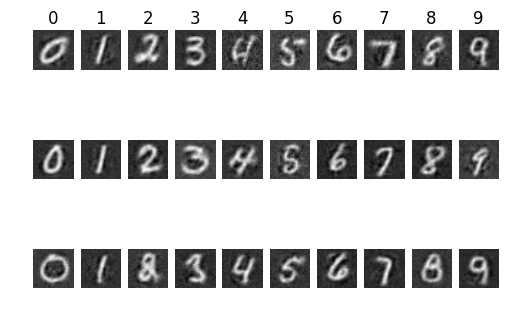

step: 4700, loss: 1147.98
Original Image (step: 4700)


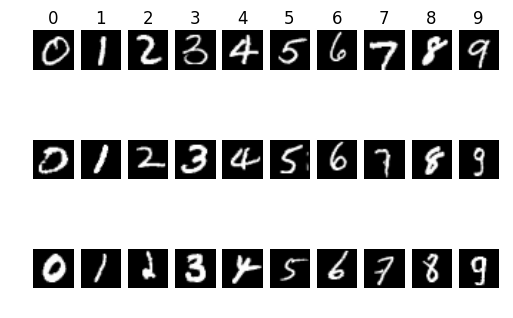


Reconstruction Image (step: 4700)


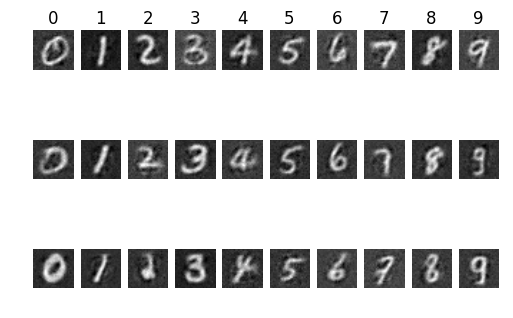

step: 4800, loss: 1210.88
Original Image (step: 4800)


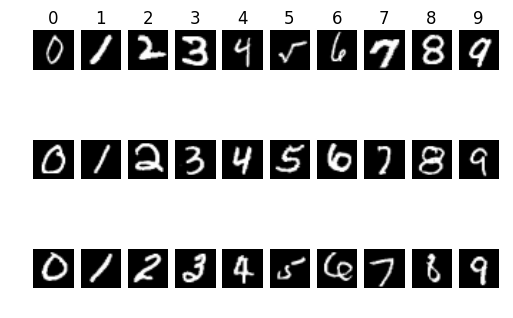


Reconstruction Image (step: 4800)


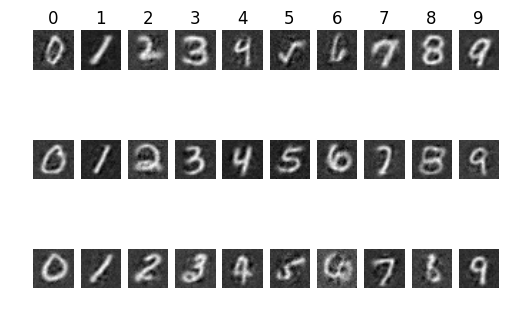

step: 4900, loss: 1031.24
Original Image (step: 4900)


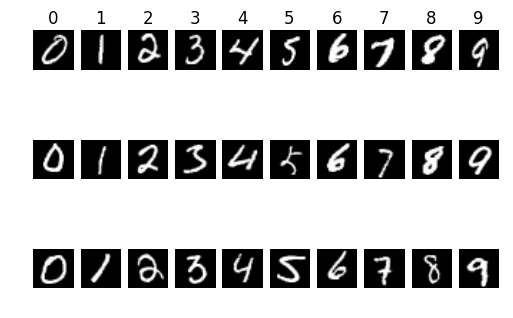


Reconstruction Image (step: 4900)


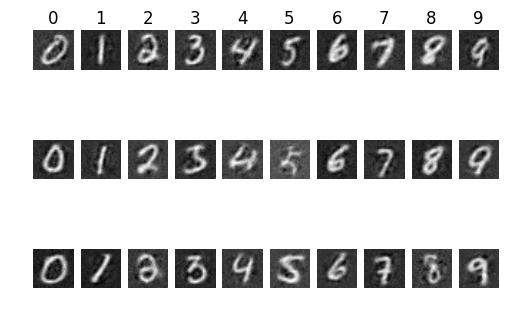

In [5]:
for i in range(num_of_iter):
    batch = mnist.train.next_batch(batch_size)
    batch_image_flat = batch[0].reshape(-1, 28*28)
    _, loss, reconstruction = sess.run([ae.optimizer, ae.loss, ae.reconstruction], feed_dict={ae.x_input: batch_image_flat})
    
    if i%100 == 0:
        print("step: %d, loss: %g"%(i, loss))
        classes = np.argmax(batch[1], 1)
        print("Original Image (step: %d)"%(i))
        plot_mnist(batch[0],classes, 3)
        print("")
        print("Reconstruction Image (step: %d)"%(i))
        reconstruction = reconstruction.reshape(-1, 28, 28)
        plot_mnist(reconstruction,classes, 3)
